In [1]:
## import hie. clustering lib
import scipy.cluster.hierarchy as sch ## for dendrogram and ploting
from sklearn.cluster import AgglomerativeClustering

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [10]:
crime_data = pd.read_csv("/content/crime_data.csv")

In [11]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [12]:
## change column name
crime_data.rename(columns={crime_data.columns[0]:"city"},inplace=True)

In [13]:
crime_data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [16]:
crime_data['Murder'].min() , crime_data['Murder'].max()

(0.8, 17.4)

In [17]:
crime_data['UrbanPop'].min() , crime_data['UrbanPop'].max()

(32, 91)

In [18]:
crime_data.iloc[:, 1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [19]:
data_norm = norm_func(crime_data.iloc[:, 1:])

In [30]:
data_norm.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


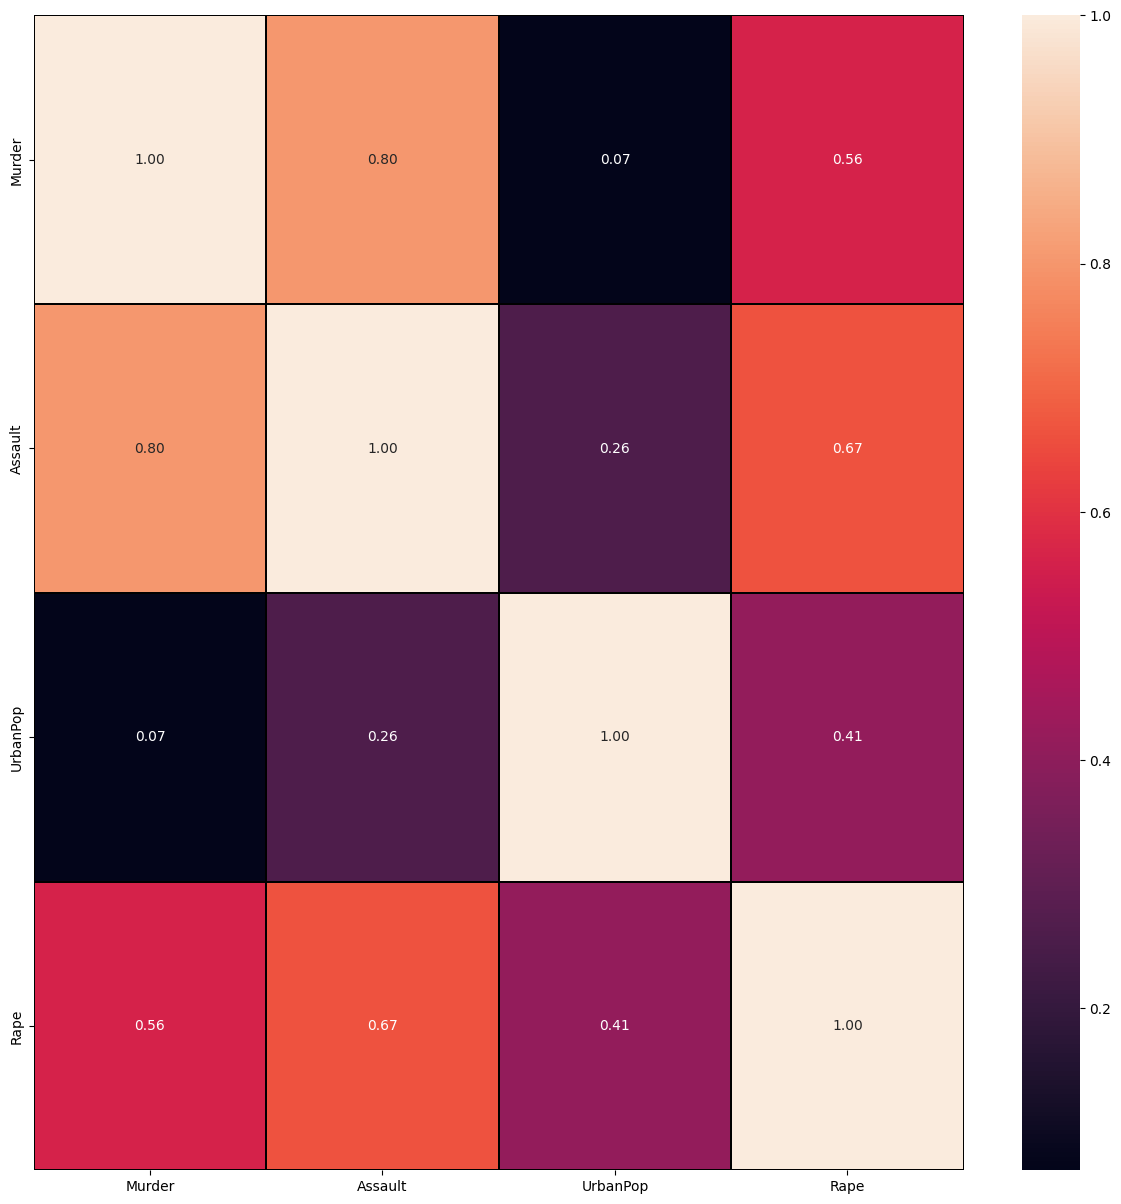

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_norm.corr(), annot=True, linewidths=0.2, linecolor="black", fmt=".2f", ax=ax)
plt.show()

In [20]:
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

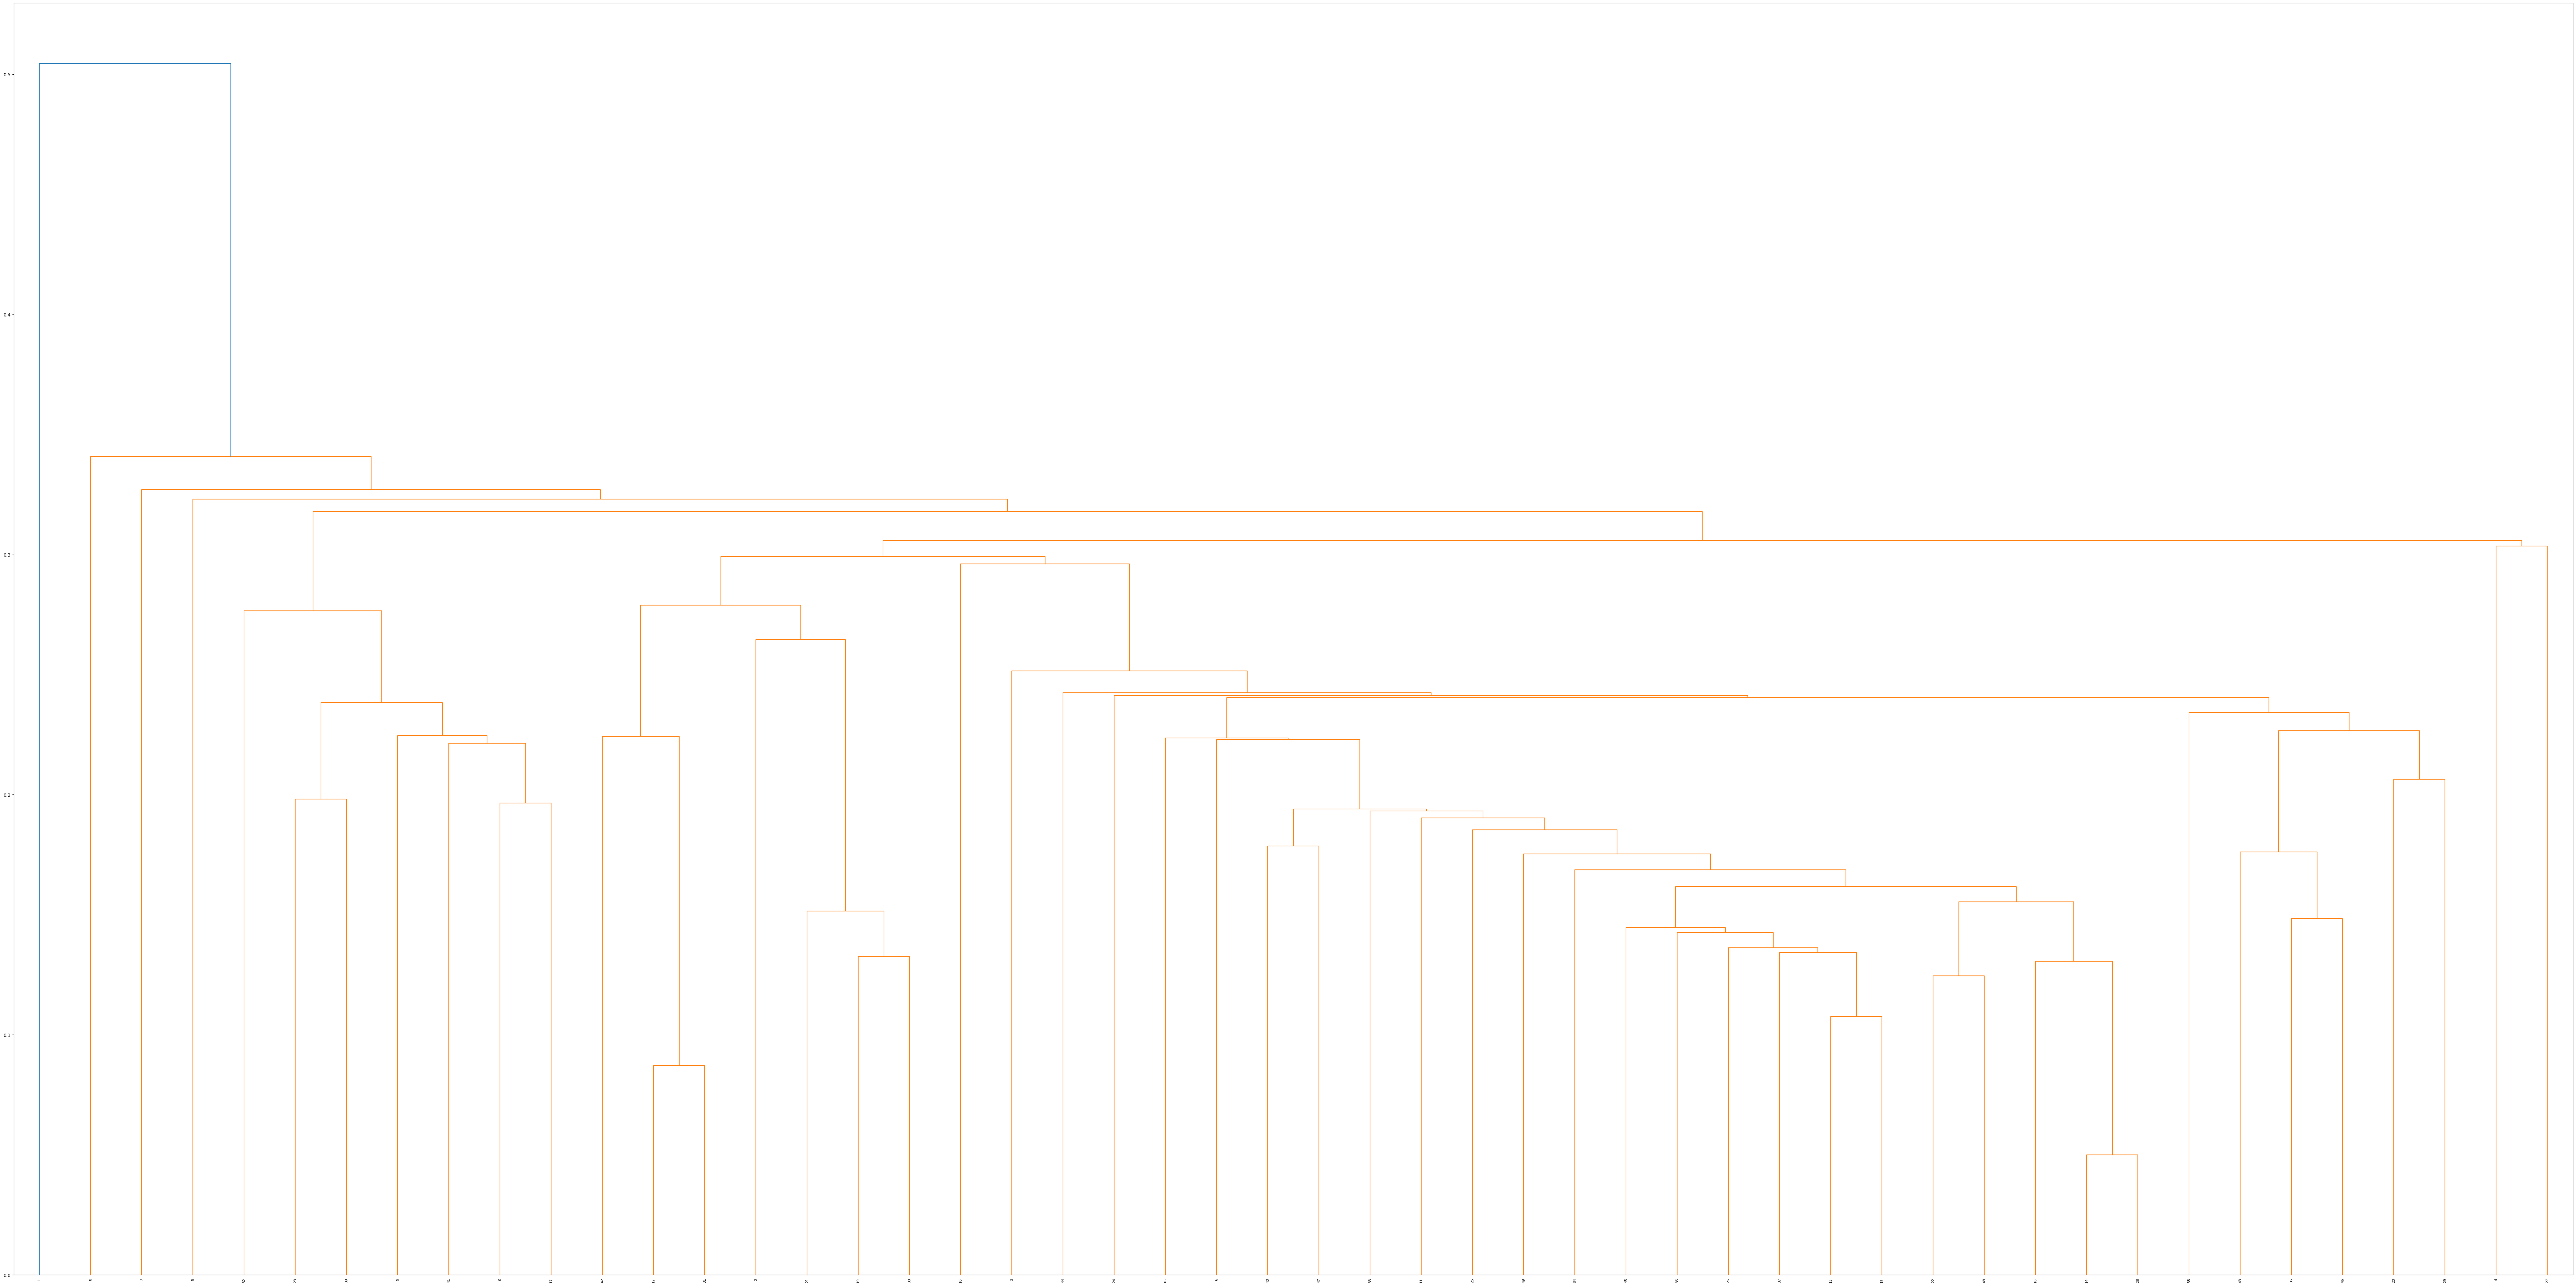

In [21]:
## values get scale down then create dendrogram
plt.figure(figsize=(100, 50))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method = 'single'))   ## we here using single linkage method
from google.colab import files

# Save the figure as a PNG image
plt.savefig('dendrogram.png')

# Download the image
files.download('dendrogram.png')

In [22]:
!pip install scipy

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
print(type(dendrogram))

<class 'function'>


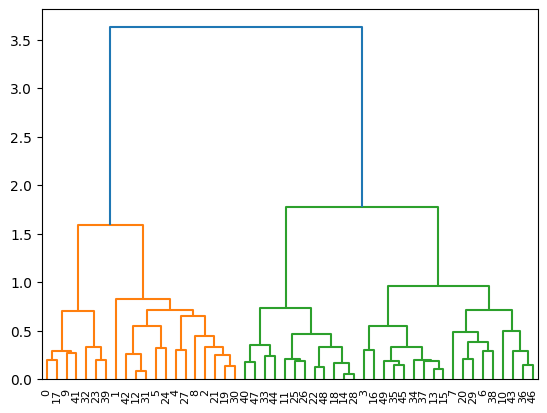

In [25]:
dendrogram = dendrogram(linkage(data_norm, method = 'ward'))

In [26]:
df_array = data_norm.to_numpy()

In [27]:
linkage_matrix = linkage(df_array, method='complete')

In [28]:
from scipy.cluster.hierarchy import dendrogram

In [33]:
# Check the type of linkage_matrix
print(type(linkage_matrix))

# If linkage_matrix is a dictionary, convert it to a NumPy array
if type(linkage_matrix) == dict:
    linkage_matrix = np.array(list(linkage_matrix.values()))

<class 'numpy.ndarray'>


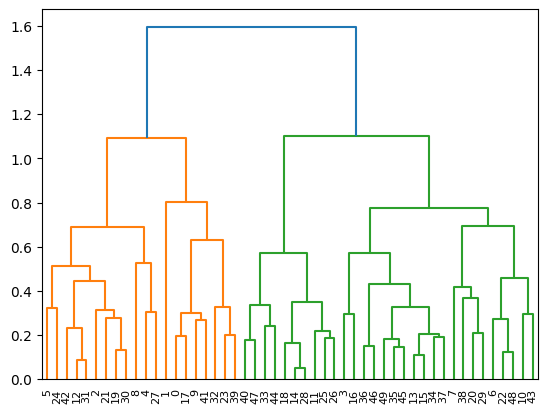

In [34]:
dendrogram1 = dendrogram(linkage_matrix)

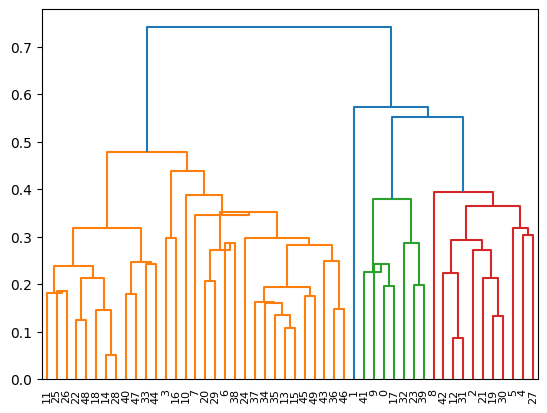

In [35]:
dendrogram2 = dendrogram(linkage(data_norm, method = 'centroid'))

In [36]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [37]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [38]:
y_hc = hc.fit_predict(data_norm)
clusters=pd.DataFrame(y_hc, columns=['clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
clusters

,clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [41]:
crime_data['cluster_id'] = clusters

In [42]:
crime_data.head()

,city,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [43]:
crime_1 = crime_data.sort_values("cluster_id")

In [44]:
crime_1

,city,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
27,Nevada,12.2,252,81,46.0,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
32,North Carolina,13.0,337,45,16.1,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0


In [45]:
cluster_sort = crime_1.iloc[:, [0,-1]]

In [46]:
cluster_sort

,city,cluster_id
0,Alabama,0
27,Nevada,0
28,New Hampshire,0
29,New Jersey,0
30,New Mexico,0
31,New York,0
32,North Carolina,0
33,North Dakota,0
34,Ohio,0
35,Oklahoma,0


In [47]:
crime_data['cluster_id'].value_counts()

0    48
1     1
2     1
Name: cluster_id, dtype: int64

In [ ]:
## till now Hire.clustering

**K-Means**

In [48]:
## import some lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [49]:
# prompt: remove dataframe column

# Remove the "cluster_id" column
crime_data.drop("cluster_id", axis=1, inplace=True)

# Print the updated DataFrame
print(crime_data.head())


         city  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [50]:
crime_data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
crime_tr = scaler.fit_transform(crime_data.iloc[:, 1:])

In [ ]:
crime_tr

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
import matplotlib.pyplot as plt

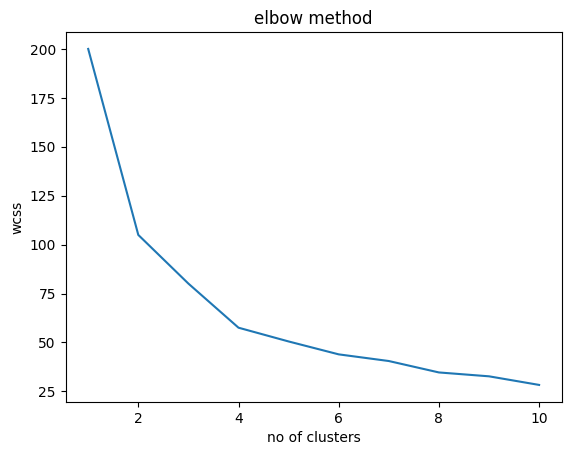

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300,random_state=0)
  kmeans.fit(crime_tr)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
predict = kmeans.fit_predict(crime_tr)

In [ ]:
predict

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
crime_data

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime_data

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime_data['cluster_id'] = predict

In [ ]:
crime_data

,city,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
data_mean = crime_data.groupby('cluster_id').agg(['mean']).reset_index()

In [ ]:
data_mean

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [ ]:
crime_data[crime_data['cluster_id']==0]

,city,Murder,Assault,UrbanPop,Rape,cluster_id
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [ ]:
crime_data[crime_data['cluster_id']==1]

,city,Murder,Assault,UrbanPop,Rape,cluster_id
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [ ]:
crime_data[crime_data['cluster_id']==2]

,city,Murder,Assault,UrbanPop,Rape,cluster_id
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [ ]:
crime_data[crime_data['cluster_id']==3]

,city,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


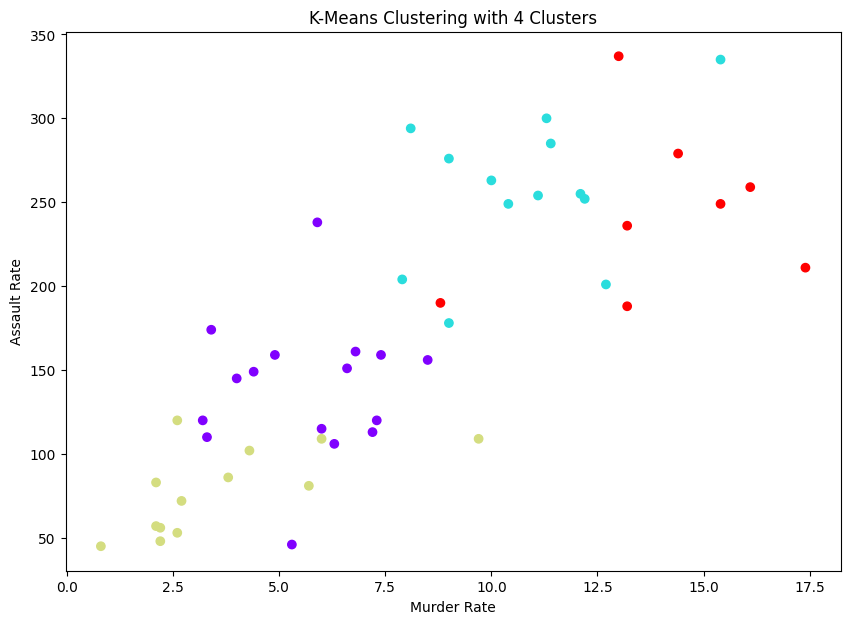

In [ ]:
# prompt: graphs for kmeans clustering

plt.figure(figsize=(10, 7))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=kmeans.labels_, cmap='rainbow')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()


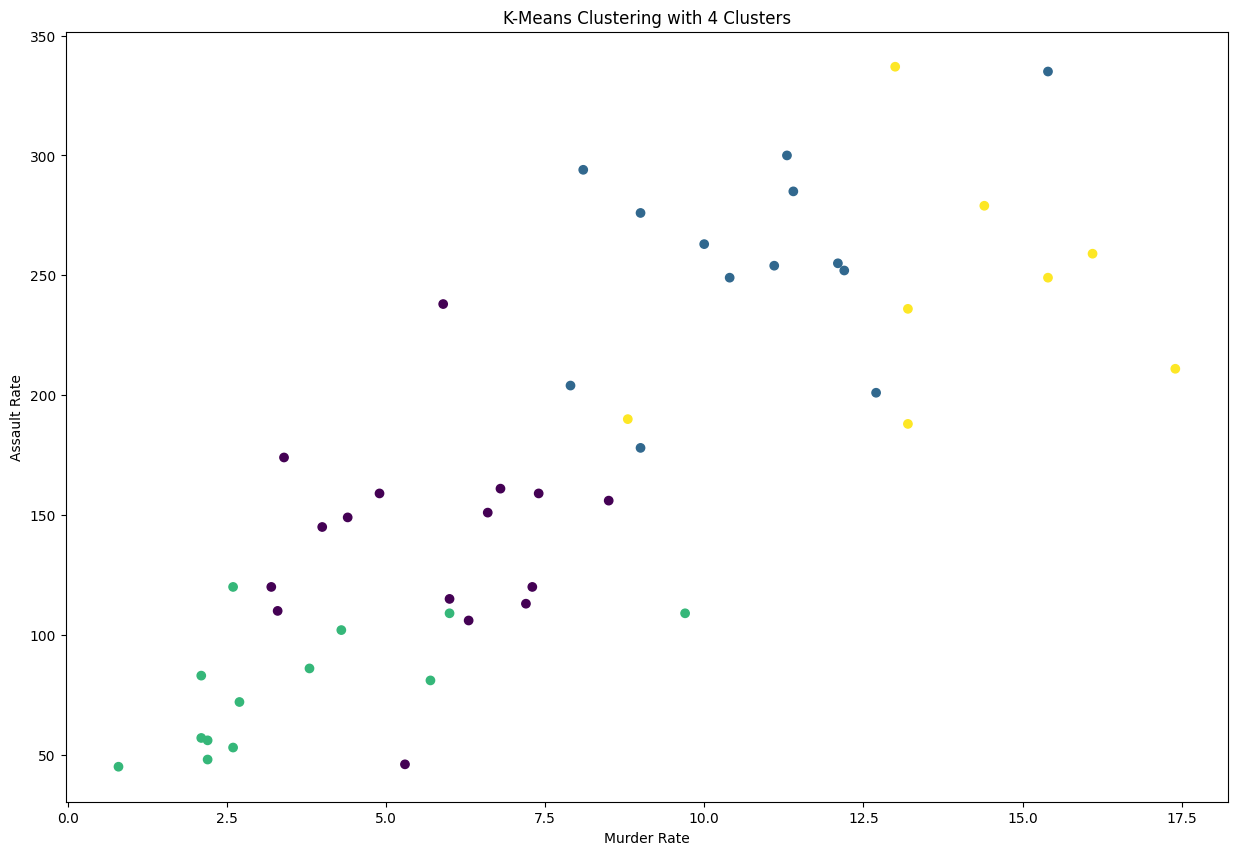

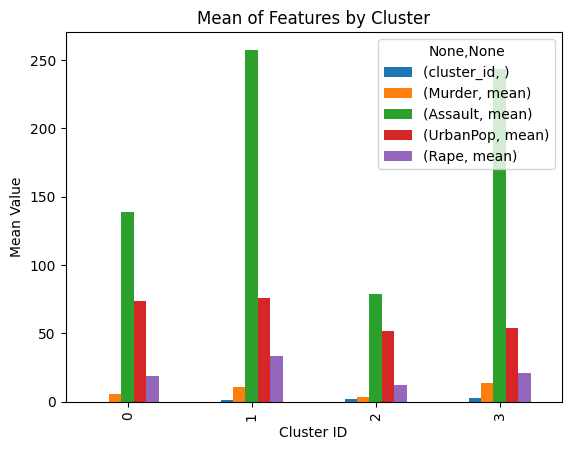

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['cluster_id'], cmap='viridis')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()

# Create a bar chart showing the mean of each cluster for each feature
data_mean.plot(kind='bar')
plt.title('Mean of Features by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Mean Value')
plt.show()

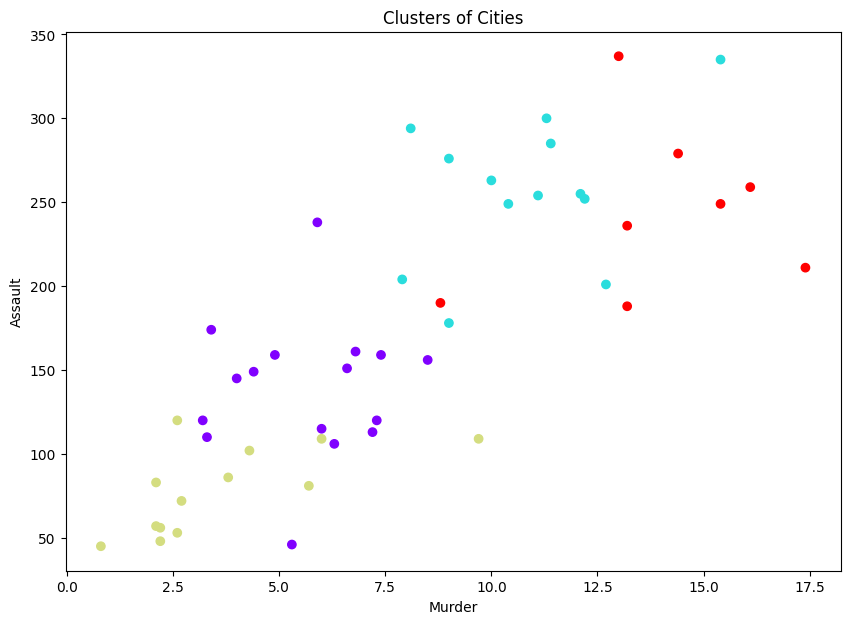

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=kmeans.labels_, cmap='rainbow')
plt.title('Clusters of Cities')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [ ]:
crime_data.head()

,city,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


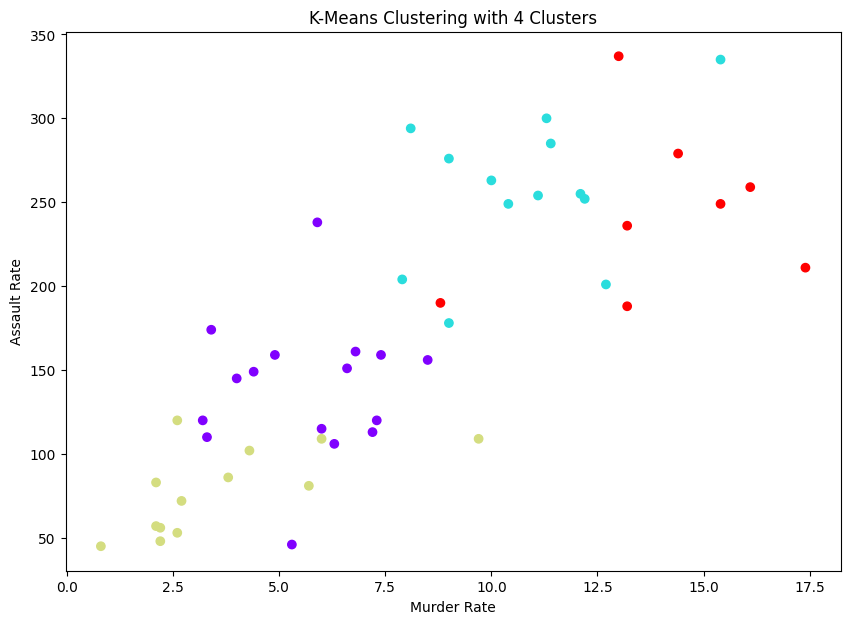

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=kmeans.labels_, cmap='rainbow')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()

*****DBSCAN

In [ ]:
crime_db = pd.read_csv("/content/crime_data.csv")

In [ ]:
crime_db.rename(columns={crime_db.columns[0]:"city"},inplace=True)

In [ ]:
crime_db.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
crime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime_db.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime_db.isna()

,city,Murder,Assault,UrbanPop,Rape
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
crime_db.isna().sum()

city        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

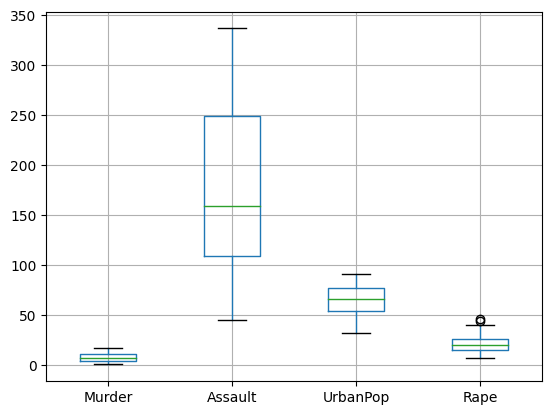

In [ ]:
crime_db.boxplot()

In [ ]:
crime_db.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_db.iloc[:, 1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df = sc.fit_transform(crime_db.iloc[:, 1:])

In [ ]:
df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db1 = DBSCAN()   ## db1 is instance  # default eps=0.5 , min_samples = 5
see = db1.fit_predict(df)

In [ ]:
see

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
db2 = DBSCAN(eps=1, min_samples=3)  ## we are trying some values
see2 = db2.fit_predict(df)

In [ ]:
db3 = DBSCAN(eps=1, min_samples=7)  ## we are trying some values
see3 = db3.fit_predict(df)

In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
df2 = pd.DataFrame(see2)

In [ ]:
df3 = pd.DataFrame(see3)

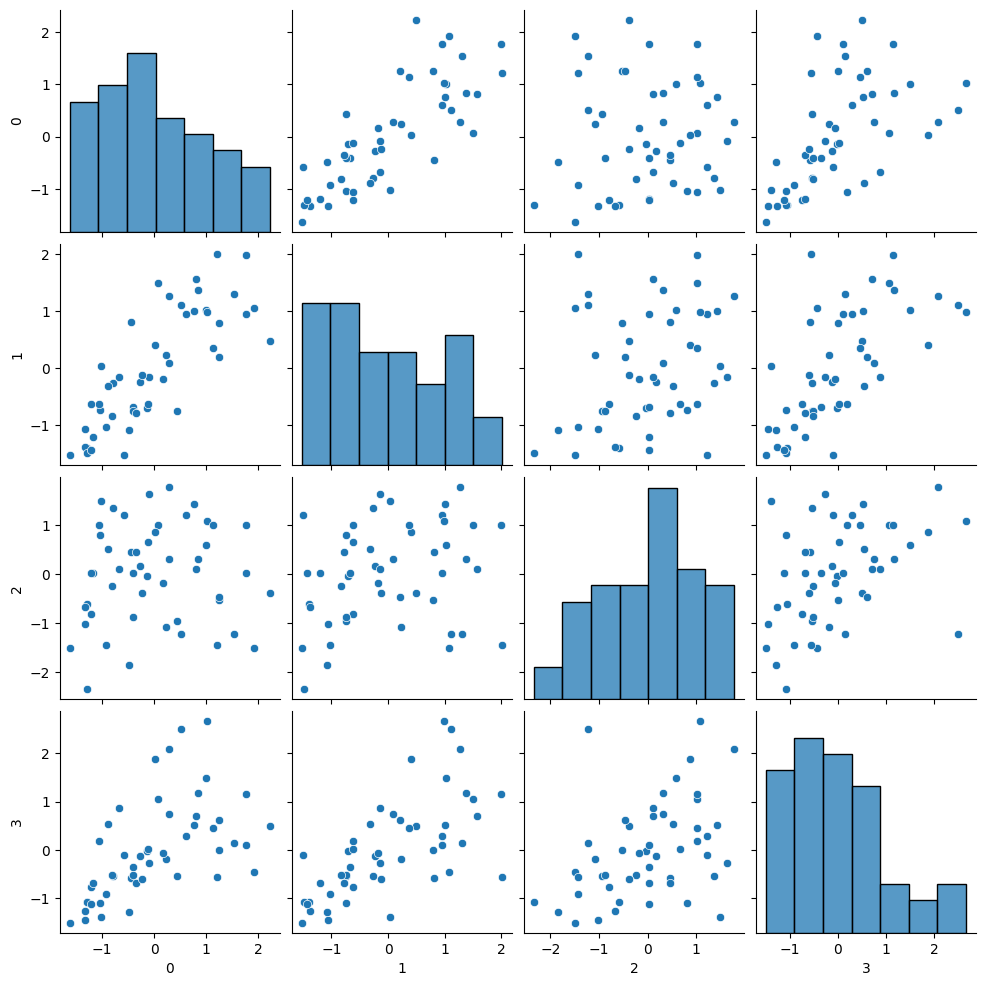

In [ ]:
sns.pairplot(df1)

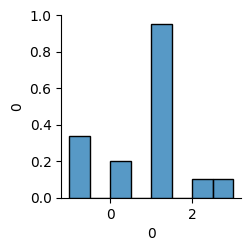

In [ ]:
sns.pairplot(df2)

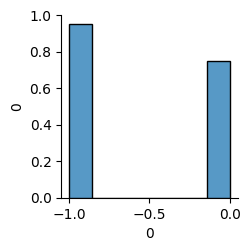

In [ ]:
sns.pairplot(df3)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
unique_labels = len(np.unique(db1.fit_predict(df)))
print(f"Number of unique labels: {unique_labels}")

Number of unique labels: 1


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(db1.fit_predict(df))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


In [ ]:
print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


In [ ]:
unique_labels = np.unique(labels)
print(len(unique_labels))

1


In [ ]:
# Increase the min_samples parameter
dbscan = DBSCAN(eps=0.5, min_samples=2)

# Fit the model and predict the labels
labels = dbscan.fit_predict(df)

# Calculate the silhouette score
silhouette_score = silhouette_score(df, labels)

print(silhouette_score)

-0.2689925316677858
